Data columns: Index(['id', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target'],
      dtype='object')
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


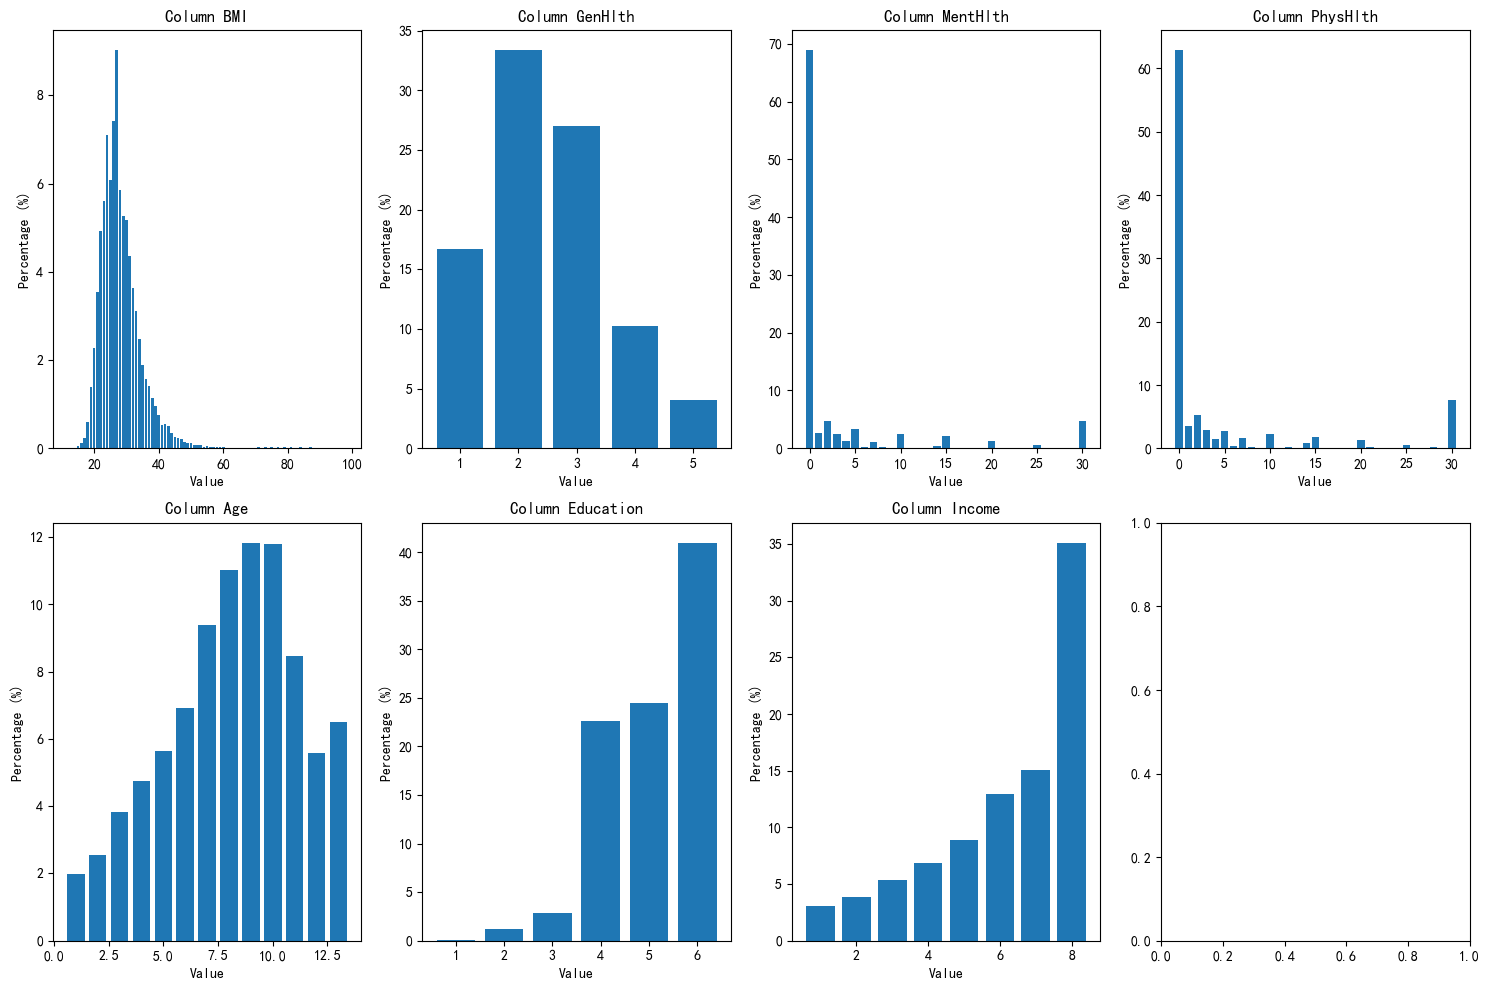

In [40]:
# Observe data
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data loading and preprocessing
def load_and_preprocess_data(filepath):
    # """
    # Load the data from the given filepath and perform some basic preprocessing steps.

    # Args:
    #     filepath (str): The path to the data file.

    # Returns:
    #     X (DataFrame): Feature data after preprocessing.
    #     y (Series): Target data.
    # """
    # Load data
    data = pd.read_csv(filepath)

    # Print the column names of the dataset for confirmation
    print("Data columns:", data.columns)

    # Drop the 'id' column if it exists in the dataset
    if 'id' in data.columns:
        data.drop(['id'], axis=1, inplace=True)

    # Fill in missing values. Fill them with the mean value of each column.
    data.fillna(data.mean(), inplace=True)

    # Separate features and label
    X = data.drop('target', axis=1)
    y = data['target']

    # Get the column names
    column_names = X.columns.tolist()
    print(column_names)

    return X, y

# 2. Plot bar charts
def plot_bar_charts(X, columns):
    # """
    # Plot bar charts for the specified columns of the given data.

    # Args:
    #     X (DataFrame): The data containing features.
    #     columns (list): List of column names to plot bar charts for.
    # """
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        # Calculate the percentage of each unique value in the column
        value_counts = X[col].value_counts(normalize=True) * 100
        # Reindex the value_counts to sort the index in ascending order (if needed)
        value_counts = value_counts.reindex(index=value_counts.index[::1])
        ax.bar(value_counts.index, value_counts.values)
        ax.set_title(f'Column {col}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Percentage (%)')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # """
    # The main function to execute the data loading, preprocessing and plotting steps.
    # """
    filepath = r'.\data.csv'  # Path to the data file
    X, y = load_and_preprocess_data(filepath)

    # Specify the columns to plot bar charts for
    columns_to_plot = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

    # Plot bar charts
    plot_bar_charts(X, columns_to_plot)

if __name__ == "__main__":
    main()

In [42]:
# Logistic Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
data = pd.read_csv(r'.\data.csv')
# Explanation: Load the data from a CSV file named 'data.csv' located in the current directory.

# Separate features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']
# Explanation: Split the dataset into features (X) and target variable (y). The 'id' and 'target' columns are removed from the feature set.

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation: Divide the data into training and test subsets. 20% of the data is reserved for the test set, and the random state is set to 42 for reproducibility.

# Oversampling (It's assumed that the 'oversample_data' function is defined elsewhere. Here we call it to handle imbalanced data if exists.)
X_train, y_train = oversample_data(X_train, y_train)
# Explanation: Apply oversampling on the training data to deal with potential class imbalance issues. The actual implementation of 'oversample_data' function is not shown here.

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Explanation: Standardize the features in both the training and test sets. The scaler is first fit on the training data and then used to transform both the training and test data to have zero mean and unit variance.

# Create a Logistic Regression model. Set the'multi_class' parameter to'multinomial' for multi-class classification (in this case, it's a three-class problem).
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
# Explanation: Instantiate a Logistic Regression model. The'multi_class' option is set to'multinomial' to handle multi-class problems, and the'solver' is set to 'lbfgs'. The 'random_state' is specified for reproducibility of the results.

# Train the model
model.fit(X_train_scaled, y_train)
# Explanation: Train the Logistic Regression model using the standardized training data.

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Explanation: Use the trained model to predict the target variable for the test set.

# Calculate the accuracy and F1 score. Here, the'macro' averaging method is used for the F1 score (which is suitable when all classes are equally important in multi-class classification).
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
# Explanation: Compute the accuracy and F1 score to evaluate the performance of the model on the test set. The'macro' averaging for F1 score treats all classes equally when aggregating the precision and recall values.

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.8433833333333334
F1 Score: 0.3959259257547232


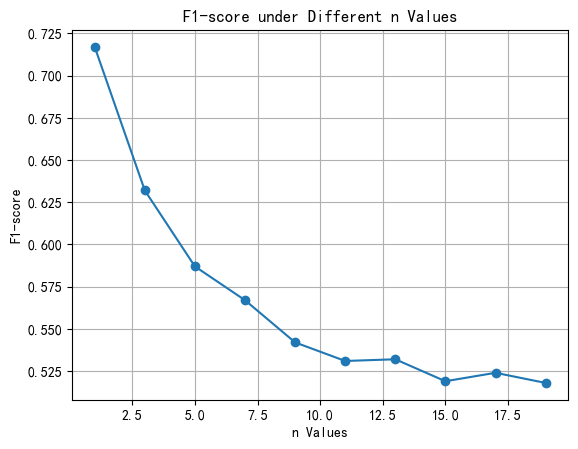

In [58]:
# KNN (K-Nearest Neighbors)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv(r'.\data.csv')
# Explanation: Load the data from the CSV file named 'data.csv' which is located in the current directory.

# Split features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']
# Explanation: Separate the feature columns from the target column. Remove the columns named 'id' and 'target' from the original dataset to obtain the feature set 'X', and assign the 'target' column as the target variable 'y'.

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation: Divide the entire dataset into two subsets, the training set and the test set. Allocate 20% of the data for the test set, and set the random_state to 42 to ensure that the splitting result can be reproduced every time the code is run.

# Oversampling (It is assumed that the 'oversample_data' function is defined elsewhere and is used to handle potential class imbalance in the training data.)
X_train, y_train = oversample_data(X_train, y_train)
# Explanation: Apply oversampling to the training data. This is usually done when there is an imbalance in the class distribution of the training data. Note that the specific implementation of the 'oversample_data' function is not shown here but should be defined in another place.

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Explanation: Standardize the feature data in both the training and test sets. First, fit the scaler on the training data to learn the mean and standard deviation of each feature. Then, use this scaler to transform both the training data (X_train_scaled) and the test data (X_test_scaled) to make the features have zero mean and unit variance, which can often improve the performance of machine learning models.

# Store the F1 scores corresponding to different values of n
f1_scores = []
# Loop through the values of n_neighbors from 1 to 20 with a step of 2
for n in range(1, 21, 2):
    # Create a KNN model with different values of n_neighbors
    model = KNeighborsClassifier(n_neighbors=n)
    # Explanation: Instantiate a K-Nearest Neighbors classifier with the specified number of neighbors 'n'.

    # Train the model
    model.fit(X_train_scaled, y_train)
    # Explanation: Train the KNN model using the standardized training data and corresponding target labels.

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Explanation: Use the trained KNN model to predict the target values for the samples in the test set based on their feature values.

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    # Explanation: Compute the macro-averaged F1 score to evaluate the performance of the model on the test set. The'macro' averaging method calculates the average of the F1 scores for each class, treating all classes equally, which is useful in multi-class classification scenarios.

    f1_scores.append(f1)
    # Explanation: Append the calculated F1 score to the list 'f1_scores' for later visualization.

# Visualization part
plt.plot(range(1, 21), f1_scores, marker='o')
# Explanation: Plot the F1 scores against the values of 'n_neighbors'. The 'marker='o'' option adds circular markers at each data point.

plt.xlabel('n_neighbors')
# Explanation: Set the label for the x-axis as 'n_neighbors'.

plt.ylabel('F1 Score')
# Explanation: Set the label for the y-axis as 'F1 Score'.

plt.title('F1 Score Comparison for Different n_neighbors in KNN')
# Explanation: Set the title of the plot to describe the comparison of F1 scores for different numbers of neighbors in the KNN algorithm.

plt.xticks(range(1, 21))
# Explanation: Set the tick locations on the x-axis to be the range from 1 to 21.

plt.show()
# Explanation: Display the generated plot.

Accuracy: 0.8922
F1 Score: 0.6182696924558057


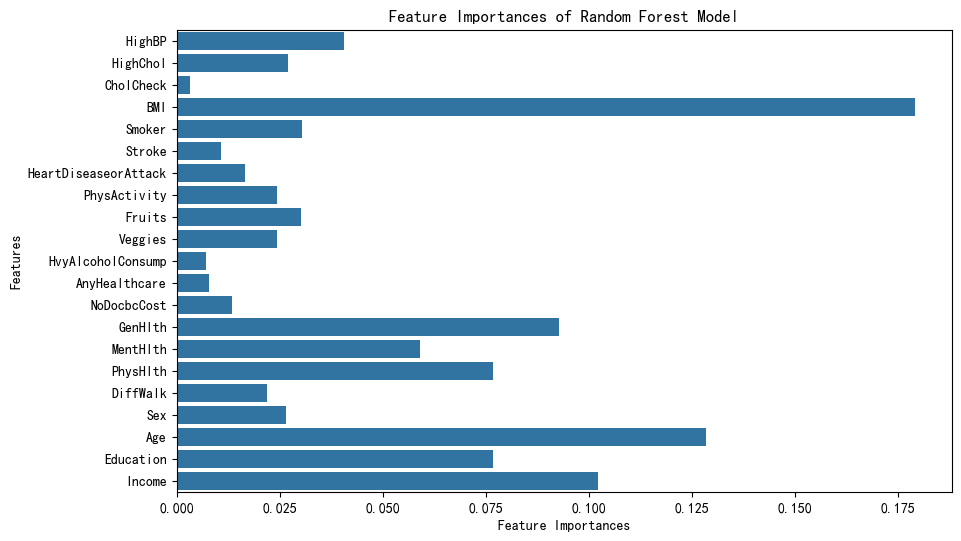

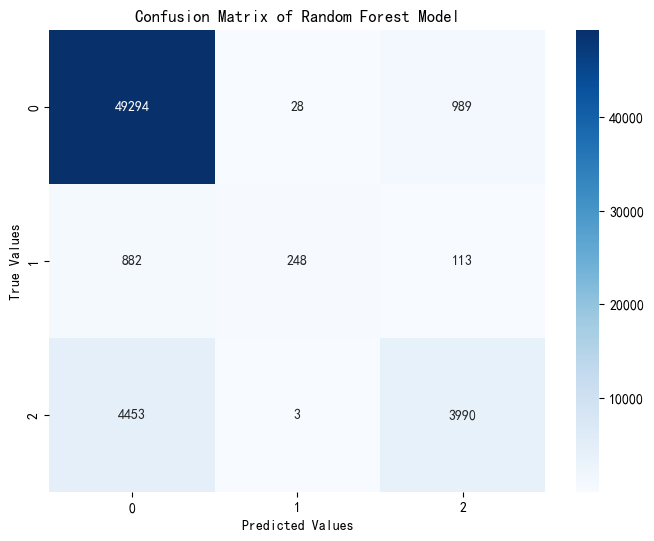

In [54]:
# Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import libraries related to visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')
# Explanation: Load the data from the CSV file named 'data.csv' in the current directory.

# Split features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']
# Explanation: Separate the feature columns from the target column. Remove the columns named 'id' and 'target' from the original dataset to obtain the feature set X, and assign the 'target' column to the variable y.

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation: Divide the entire dataset into two parts, namely the training set and the test set. Allocate 20% of the data for the test set, and set the random_state to 42 to ensure the reproducibility of the splitting result each time the code runs.

# Oversampling (It is assumed that the 'oversample_data' function is defined elsewhere and is used to handle potential class imbalance in the training data.)
X_train, y_train = oversample_data(X_train, y_train)
# Explanation: Apply oversampling to the training data. This step is usually taken when there is an imbalance among different classes in the training data. The specific implementation of the 'oversample_data' function is not shown here but should be defined in another place.

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Explanation: Instantiate a Random Forest classifier. The 'n_estimators' parameter is set to 100, indicating that 100 decision trees will be used in the ensemble. The 'random_state' is set to 42 to ensure the reproducibility of the model initialization and training process.

# Train the model
model.fit(X_train, y_train)
# Explanation: Train the Random Forest model using the training data and corresponding target labels. During the training process, the model learns patterns and relationships in the data to make predictions later.

# Make predictions on the test set
y_pred = model.predict(X_test)
# Explanation: Use the trained Random Forest model to predict the target values for the samples in the test set based on their feature values.

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
# Explanation: Compute the accuracy and F1 score to evaluate the performance of the trained model on the test set. The accuracy represents the proportion of correctly predicted samples. The'macro' averaging method for the F1 score calculates the average of the F1 scores for each class, treating all classes equally, which is suitable for multi-class classification scenarios.

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Visualization Part

# 1. Visualization of Feature Importances
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances of Random Forest Model')
plt.show()

# 2. Visualization of Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

In [46]:
# XGBoost
import xgboost as XGBoostClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv(r'.\data.csv')
# Explanation: Load the data from a CSV file named 'data.csv' located in the current directory.

# Split features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']
# Explanation: Separate the feature columns from the target column. Here, the columns named 'id' and 'target' are removed from the original dataset to obtain the feature set 'X', and the 'target' column itself is assigned to 'y'.

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation: Divide the entire dataset into two parts, the training set and the test set. 20% of the data is allocated for the test set, and a fixed random state of 42 is set to ensure reproducibility of the split results each time the code is run.

# Oversampling (It is assumed that the 'oversample_data' function is defined elsewhere and will be used to handle potential class imbalance issues in the training data.)
X_train, y_train = oversample_data(X_train, y_train)
# Explanation: Apply oversampling to the training data. This step is usually done when there is an imbalance in the class distribution of the training data. The specific implementation of the 'oversample_data' function is not shown here but is expected to be defined elsewhere.

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Explanation: Standardize the feature data in both the training and test sets. First, the scaler is fitted to the training data to learn the mean and standard deviation of each feature. Then, this learned transformation is applied to both the training data (X_train_scaled) and the test data (X_test_scaled) to make the features have zero mean and unit variance, which can often improve the performance of machine learning models.

# Create an XGBoost model
model = XGBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# Explanation: Instantiate an XGBoost model. The 'n_estimators' parameter is set to 100, indicating that 100 boosting rounds (or decision trees in the ensemble) will be used. The 'learning_rate' parameter is set to 0.1, which controls the step size at each boosting iteration. The 'random_state' is set to 42 to ensure the reproducibility of the model initialization and training process.

# Train the model
model.fit(X_train_scaled, y_train)
# Explanation: Train the XGBoost model using the standardized training data and the corresponding target labels. During the training process, the model learns the patterns and relationships in the data to make predictions.

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Explanation: Use the trained XGBoost model to predict the target values for the samples in the test set based on their feature values.

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
# Explanation: Compute the accuracy and F1 score to evaluate the performance of the trained model on the test set. The accuracy represents the proportion of correctly predicted samples. The'macro' averaging method for the F1 score calculates the average of the F1 scores for each class, treating all classes equally, which is useful in multi-class classification scenarios.

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.8466083407402039
F1 Score: 0.3792773988164028


In [44]:
# Adaboosting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


# Read data
data = pd.read_csv(r'.\data.csv')

# Split features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling (It is assumed that the 'oversample_data' function is defined elsewhere. Here we call it to handle imbalanced data if exists.)
X_train, y_train = oversample_data(X_train, y_train)

# Create an Adaboosting model
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8461333333333333
F1 Score: 0.40931948171018967


In [48]:
# GBDT (Gradient Boosting Decision Tree)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
data = pd.read_csv(r'.\data.csv')
# Explanation: Load the data from the CSV file named 'data.csv' which is located in the current directory.

# Split features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']
# Explanation: Separate the feature columns from the target column. The columns named 'id' and 'target' are removed from the original dataset to obtain the feature set X, while the 'target' column is assigned as the target variable y.

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation: Divide the whole dataset into two parts, namely the training set and the test set. Here, 20% of the data is set aside for the test set, and the random_state is set to 42 to ensure that the splitting result can be reproduced in each run of the code.

# Oversampling (It's assumed that the 'oversample_data' function is defined elsewhere and is used to handle potential class imbalance in the training data.)
X_train, y_train = oversample_data(X_train, y_train)
# Explanation: Apply oversampling to the training data. This operation is usually carried out when there is an imbalance among different classes in the training data. Note that the specific implementation of the 'oversample_data' function is not shown here but should be defined in another place.

# Create a GBDT model
model = GradientBoostingClassifier(n_estimators = 100, random_state=42)
# Explanation: Instantiate a Gradient Boosting Decision Tree model. The 'n_estimators' parameter is set to 100, which means 100 boosting stages (or decision trees in the ensemble) will be used. The 'random_state' is set to 42 to ensure the reproducibility of the model's initialization and training process.

# Train the model
model.fit(X_train, y_train)
# Explanation: Train the Gradient Boosting Decision Tree model using the training data and corresponding target labels. During the training process, the model learns the patterns and relationships in the data to make predictions later.

# Make predictions on the test set
y_pred = model.predict(X_test)
# Explanation: Utilize the trained Gradient Boosting Decision Tree model to predict the target values for the samples in the test set based on their feature values.

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
# Explanation: Compute the accuracy and F1 score to evaluate the performance of the trained model on the test set. The accuracy indicates the proportion of samples that are correctly predicted. The'macro' averaging method for the F1 score calculates the average of the F1 scores for each class, treating all classes equally, which is suitable for multi-class classification scenarios.

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8477
F1 Score: 0.485462311655


In [56]:
# MLP (Multi-Layer Perceptron)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv(r'.\data.csv')
# Explanation: Load the data from the CSV file named 'data.csv' which is located in the current directory.

# Split features and target
X = data.drop(['id', 'target'], axis=1)
y = data['target']
# Explanation: Separate the feature columns from the target column. Here, we remove the columns named 'id' and 'target' from the original dataset to obtain the feature set 'X', and assign the 'target' column as the target variable 'y'.

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation: Divide the entire dataset into two subsets, the training set and the test set. We allocate 20% of the data for the test set. The 'random_state' is set to 42 to ensure that the splitting result can be reproduced every time the code is run.

# Oversampling (It is assumed that the 'oversample_data' function is defined elsewhere and is used to handle potential class imbalance in the training data.)
X_train, y_train = oversample_data(X_train, y_train)
# Explanation: Apply oversampling to the training data. This is usually done when there is an imbalance in the class distribution of the training data. Note that the specific implementation of the 'oversample_data' function is not shown here but should be defined in another place.

# Create an MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
# Explanation: Instantiate a Multi-Layer Perceptron model. The 'hidden_layer_sizes' parameter is set to (100,), which means there will be one hidden layer with 100 neurons in this neural network. The'max_iter' parameter is set to 1000, indicating the maximum number of iterations for the training process. The 'random_state' is set to 42 to ensure the reproducibility of the model initialization and training.

# Train the model
model.fit(X_train_scaled, y_train)
# Explanation: Train the Multi-Layer Perceptron model using the training data. However, please note that in the current code, 'X_train_scaled' should be properly defined before this line (it's likely obtained through data standardization steps that might be missing or incomplete in this shown code snippet).

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Explanation: Use the trained Multi-Layer Perceptron model to predict the target values for the samples in the test set. Similar to the training step, 'X_test_scaled' should also be correctly defined beforehand, usually through the same data standardization process as for the training data.

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
# Explanation: Compute the accuracy and F1 score to evaluate the performance of the trained model on the test set. The accuracy represents the proportion of samples that are correctly predicted. The'macro' averaging method for the F1 score calculates the average of the F1 scores for each class, treating all classes equally, which is useful in multi-class classification scenarios.

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8477666666666667
F1 Score: 0.4170136747808919 


In [ ]:
# Ensemble Learning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

def load_and_preprocess_data(filepath):
    # """
    # Load the data from the given filepath and perform a series of preprocessing steps.

    # Args:
    #     filepath (str): The path to the data file.

    # Returns:
    #     X_train (DataFrame): The feature data of the training set after preprocessing.
    #     X_test (DataFrame): The feature data of the test set after preprocessing.
    #     y_train (Series): The target data of the training set.
    #     y_test (Series): The target data of the test set.
    # """
    # Load data
    data = pd.read_csv(r'.\data.csv')
    # Explanation: Read the data from the CSV file located in the current directory.

    # Print the column names of the dataset for confirmation
    print("Data columns:", data.columns)
    # Explanation: Display the column names of the loaded dataset to verify its structure.

    # Drop the 'id' column if it exists in the dataset
    if 'id' in data.columns:
        data.drop(['id'], axis=1, inplace=True)
    # Explanation: Remove the 'id' column from the dataset if it is present. This column is often not relevant for model training.

    # Fill in missing values. Fill them with the mean value of each column.
    data.fillna(data.mean(), inplace=True)
    # Explanation: Fill any missing values in the dataset with the mean value of the respective columns.

    # Separate features and label
    X = data.drop('target', axis=1)
    y = data['target']
    # Explanation: Split the dataset into features (X) and the target variable (y). The 'target' column is separated from the rest of the features.

    # Get the column names
    column_names = X.columns.tolist()
    print(column_names)
    # Explanation: Obtain the list of column names of the feature dataset and print them.

    # Convert values in columns 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18 to binary values (0 or 1). Values greater than or equal to 0.5 are set to 1, and values less than 0.5 are set to 0.
    binary_columns = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]
    for col_idx in binary_columns:
        X.iloc[:, col_idx] = (X.iloc[:, col_idx] >= 0.5).astype(int)
    # Explanation: For the specified columns in the feature dataset, transform the values to binary format based on the given condition.

    # Standardize the data in columns 4, 14, 19, 20, 21. Normalize them to a range between 0 and 1.
    continuous_columns = [3, 13, 14, 15, 18, 19, 20]
    scaler = MinMaxScaler()
    X.iloc[:, continuous_columns] = scaler.fit_transform(X.iloc[:, continuous_columns])
    # Explanation: Apply normalization to the specified columns of the feature dataset using MinMaxScaler to scale the values between 0 and 1.

    # Split the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Explanation: Divide the preprocessed dataset into two parts: the training set and the test set. 20% of the data is reserved for the test set, and a fixed random state of 42 is set to ensure reproducibility of the split.

    return X_train, X_test, y_train, y_test

def oversample_data(X_train, y_train):
    # """
    # Perform oversampling on the training data using the SMOTE (Synthetic Minority Over-sampling Technique) method.

    # Args:
    #     X_train (DataFrame): The feature data of the training set.
    #     y_train (Series): The target data of the training set.

    # Returns:
    #     X_resampled (DataFrame): The feature data of the resampled training set.
    #     y_resampled (Series): The target data of the resampled training set.
    # """
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled
    # Explanation: Use the SMOTE algorithm to oversample the minority class(es) in the training data to handle potential class imbalance issues.

def train_models(X_train, y_train):
    # """
    # Train multiple machine learning models with hyperparameter tuning using GridSearchCV.

    # Args:
    #     X_train (DataFrame): The feature data of the training set after oversampling.
    #     y_train (Series): The target data of the training set after oversampling.

    # Returns:
    #     best_models (dict): A dictionary containing the best estimators for each model after hyperparameter tuning.
    # """
    models = {
        'RandomForest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Bagging': BaggingClassifier()
    }
    # Explanation: Instantiate several machine learning models including RandomForestClassifier, KNeighborsClassifier, AdaBoostClassifier, and BaggingClassifier.

    param_grids = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [10, 30],
            'min_samples_leaf': [2, 5]
        },
        'KNN': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        },
        'AdaBoost': {
            'n_estimators': [50, 100],
            'learning_rate': [0.1, 0.01]
        },
        'Bagging': {
            'n_estimators': [50, 100],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0]
        }
    }
    # Explanation: Define the hyperparameter grids for each model. These grids specify the different combinations of hyperparameters to be searched during the tuning process.

    best_models = {}
    for name, model in models.items():
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1_macro')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    # Explanation: For each model, perform a grid search with 5-fold cross-validation using the 'f1_macro' scoring metric to find the best combination of hyperparameters. Store the best estimator for each model in the 'best_models' dictionary.

    return best_models

def evaluate_model(model, X_test, y_test):
    # """
    # Evaluate the performance of a given model using classification_report and calculate the F1 score.

    # Args:
    #     model (estimator): The trained machine learning model to be evaluated.
    #     X_test (DataFrame): The feature data of the test set.
    #     y_test (Series): The target data of the test set.
    # """
    y_pred = model.predict(X_test)
    print(f"Model: {type(model).__name__}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro')}\n")
    # Explanation: Use the trained model to make predictions on the test set. Then print the classification report which includes metrics like precision, recall, and F1 score for each class. Also, calculate and print the macro-averaged F1 score for the overall model performance.

def ensemble_models(models, X_train, y_train):
    # """
    # Create an ensemble model using VotingClassifier with the given base models.

    # Args:
    #     models (dict): A dictionary containing the trained base models.
    #     X_train (DataFrame): The feature data of the training set.
    #     y_train (Series): The target data of the training set.

    # Returns:
    #     voting_clf (VotingClassifier): The trained ensemble model.
    # """
    voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')
    voting_clf.fit(X_train, y_train)
    return voting_clf
    # Explanation: Combine the given base models into an ensemble using VotingClassifier with the 'hard' voting strategy. Train the ensemble model on the training data.

def main():
    # """
    # The main function that orchestrates the entire process including data loading, preprocessing, oversampling, model training, evaluation, and ensemble creation.
    # """
    filepath = 'data.csv'  # Path to the data file
    X_train, X_test, y_train, y_test = load_and_preprocess_data(filepath)

    # Oversampling
    X_resampled, y_resampled = oversample_data(X_train, y_train)

    # Train multiple models
    models = train_models(X_resampled, y_resampled)

    # Evaluate each model
    for name, model in models.items():
        print(f"Evaluating {name}...")
        evaluate_model(model, X_test, y_test)

    # Ensemble models
    ensemble_model = ensemble_models(models, X_resampled, y_resampled)
    print("Evaluating Ensemble Model...")
    evaluate_model(ensemble_model, X_test, y_test)


if __name__ == "__main__":
    main()